In [3]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Position Control Torque Update 

In [5]:
!pip install JSAnimation

You should consider upgrading via the 'c:\users\rbd218\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


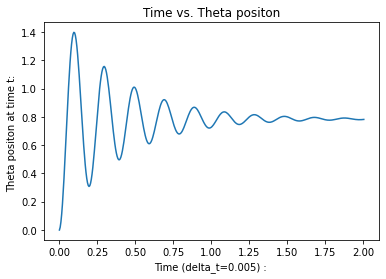

x1,y1 1.0 0.0
x2,y2 -1.0 1.2246467991473532e-16
x1,y1 0.9998072404820648 0.0196336924606283
x2,y2 -0.9998072404820648 -0.01963369246062829
x1,y1 0.9983229253733518 0.05789073046691567
x2,y2 -0.9983229253733518 -0.05789073046691539
x1,y1 0.9935724730895605 0.11319779467239899
x2,y2 -0.9935724730895605 -0.1131977946723989
x1,y1 0.9830519850506819 0.18332701570667057
x2,y2 -0.9830519850506819 -0.18332701570667034
x1,y1 0.9641563593991661 0.26533472187059515
x2,y2 -0.9641563593991661 -0.2653347218705951
x1,y1 0.9346407029748005 0.35559352685724016
x2,y2 -0.9346407029748006 -0.35559352685723983
x1,y1 0.8930497423030037 0.44995795111603326
x2,y2 -0.8930497423030038 -0.44995795111603304
x1,y1 0.8390425790072387 0.5440657594564113
x2,y2 -0.8390425790072388 -0.5440657594564111
x1,y1 0.7735506726380258 0.6337344529542779
x2,y2 -0.7735506726380259 -0.6337344529542778
x1,y1 0.6987370323060152 0.7153786128227364
x2,y2 -0.6987370323060152 -0.7153786128227364
x1,y1 0.6177672315776644 0.78636101606632

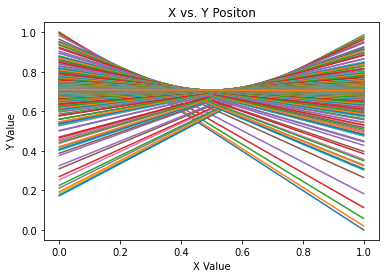

In [3]:
import time
import numpy as np

'''
Free-Fall Position Update
'''
theta_positions = []
time_intervals = []
delta_t = .005 # in seconds 
g = np.ndarray((3,), dtype=float, buffer=np.array([0.0, 0.0, -9.81]))
t = 0
run_time  = 2

# initial values 
theta = 0.0
d_theta_dt = 0.0 # angular velocity 
dd_theta_dt = 0.0 # angular acceleration

# target
target = np.pi/4  
accumulated_pos_error = 0
# control parameters

# best so far 
kp = 5
kd = 5
ki = 0 

# Experimented with these values : 
# kp = kd = ki = 1 does not converge at all !
# kp = 10 and kd = 1 and ki = 0 converges slowly # 7 seconds 


# iterate through this while loop until desired 
# target velocity is reached 
theta_positions.append(theta)
time_intervals.append((t))
while t < run_time :
        
  
    # PD control for acceleration in z - direction : 
    dd_theta_dt = kp * (target - theta) + kd * (-d_theta_dt) + ki * (accumulated_pos_error)
   
    
    # TODO: may need to use sin, cos to model the turn 
    # TODO: will have to factor in length not just orientation equation
    # TODO: need to watch youtube video on this 
    
    # update predicted current z-direction velocity of object (initially 0) : 
    d_theta_dt  = d_theta_dt + dd_theta_dt * delta_t
    
    # update current position : 
    theta = theta + d_theta_dt 
    
    t = t + delta_t
    
    # print(theta)
    theta_positions.append(theta)
    time_intervals.append(t)
    # time.sleep(delta_t) # in seconds
    

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# print("Time (delta_t=0.5) : ", time_intervals)
# print("Z positon at time t: ",z_positions)

plt.title('Time vs. Theta positon')
plt.xlabel('Time (delta_t=0.005) : ')
plt.ylabel('Theta positon at time t: ')

plt.plot(time_intervals, theta_positions)

plt.show()


plt.title('X vs. Y Positon')
plt.xlabel('X Value')
plt.ylabel('Y Value')

theta_positions2 = ((np.pi) + np.asarray(theta_positions)).tolist()
[x2, x1] = [np.cos(theta_positions2).tolist(), np.cos(theta_positions).tolist()]
[y2,y1] = [np.sin(theta_positions2).tolist(), np.sin(theta_positions).tolist()]
for i in range(0,len(x1)) : 
    print("x1,y1", x1[i],y1[i])
    print("x2,y2", x2[i],y2[i])



# parameterize with s or t ? 
plt.plot([x1,y1])

plt.show()

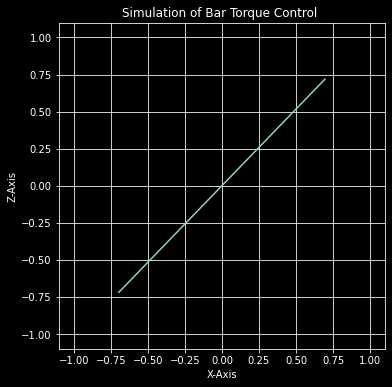

In [8]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation


         
from JSAnimation import IPython_display    
from IPython.display import HTML


fig = plt.figure() 
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-1.1, 1.1), ylim=(-1.1,1.1))
ax.grid()

line, =  ax.plot(0, 0)


def animate(i):
    """perform animation step"""
    line.set_data(([x1[i], x2[i]],[y1[i],y2[i]] ))
    return line

# choose the interval based on dt and the time to animate one step
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * delta_t - (t1 - t0)

plt.title('Simulation of Bar Torque Control ')
plt.xlabel('X-Axis')
plt.ylabel('Z-Axis')
animation = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval)


HTML(animation.to_jshtml())
